# Practica 3: Histograma para generar vectores de caractersticas

### 1. Objetivos

El alumno:
* Aprendera a calcular el histograma global y local de la imagen
* Entendera como calcular la distancia de error entre dos histogramas

### 2. Introduccion

Para calcular la distancia entre histogramas una medida comunmente utilizada es la distancia Chi-Square. De entre las distintas versiones existentes, se encuentran las siguientes:

$d = \frac{1}{2}\sum\limits_{i=1}^{n} \frac{(x_i-y_i)^2}{x_i+y_i}$

$d = \sum\limits_{i=1}^{n} \frac{(x_i-y_i)^2}{y_i}$

$d = \sum\limits_{i=1}^{n} (x_i-y_i)^2$

### 3. Desarrollo

In [970]:
import cv2
import scipy
from skimage import util
from skimage import color
from skimage import exposure
from skimage import measure
from skimage import morphology
from skimage.filters import rank
from skimage import img_as_ubyte
from scipy import signal
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### A.1 Ecualizacion local

Realizar la ecualizacion del histograma local, definido por una ventana de nxn pixeles.

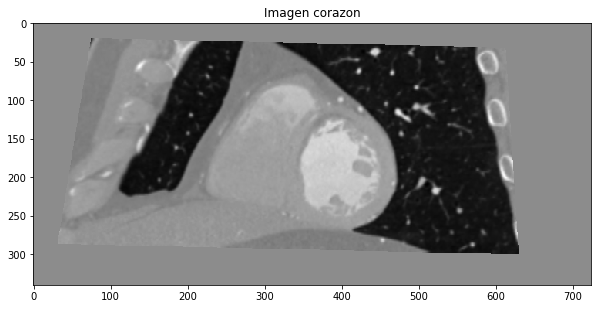

In [971]:
imgs = []
imgs3 = []

for i in range(1,11):
    imgs.append(cv2.imread('im_1_'+str(i)+'.png', 0))
    imgs3.append(cv2.imread('im_3_'+str(i)+'.png', 0))
    
plt.figure(figsize=(10,7))
plt.imshow(imgs[7], cmap='gray')
plt.title('Imagen corazon')
plt.show()

In [972]:
# Ecualizacion local de la imagen 
im_local_eq7 = rank.equalize(imgs[7], selem=np.ones((7,7)))
im_local_eq11 = rank.equalize(imgs[7], selem=np.ones((11,11)))

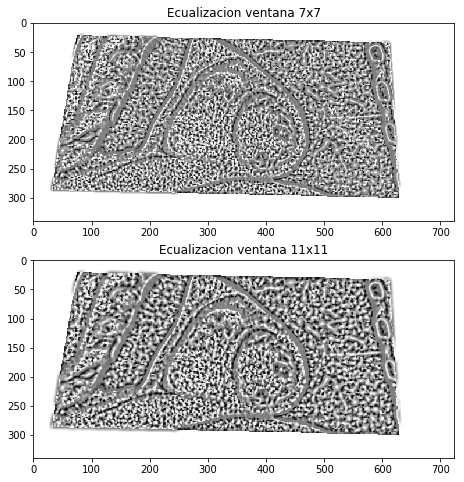

In [973]:
plt.figure(figsize=(13,8))
plt.subplot(211)
plt.imshow(im_local_eq7, cmap='gray')
plt.title('Ecualizacion ventana 7x7')
plt.subplot(212)
plt.imshow(im_local_eq11, cmap='gray')
plt.title('Ecualizacion ventana 11x11')
plt.show()

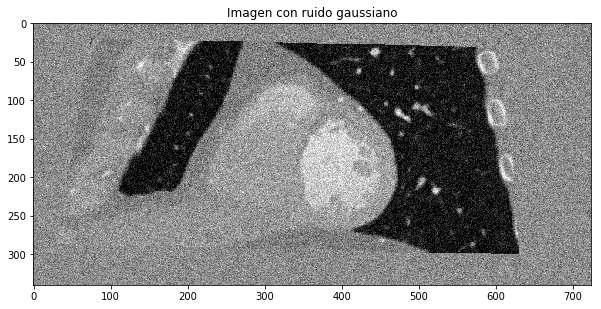

In [974]:
# Agregar ruido gaussiano a la imagen
im_noise = util.random_noise(imgs[7], mode='gaussian', var=0.01)

plt.figure(figsize=(10,7))
plt.imshow(im_noise, cmap='gray')
plt.title('Imagen con ruido gaussiano')
plt.show()

In [975]:
# Ecualizacion de las imagenes con ruido
im_nleq33 = rank.equalize(imgs[7], selem=np.ones((3,3)))
im_nleq55 = rank.equalize(imgs[7], selem=np.ones((15,15)))

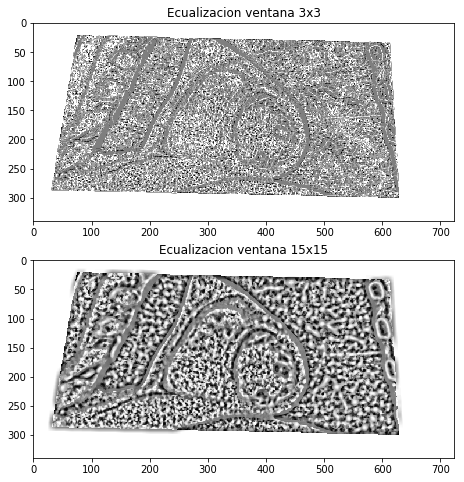

In [976]:
plt.figure(figsize=(13,8))
plt.subplot(211)
plt.imshow(im_nleq33, cmap='gray')
plt.title('Ecualizacion ventana 3x3')
plt.subplot(212)
plt.imshow(im_nleq55, cmap='gray')
plt.title('Ecualizacion ventana 15x15')
plt.show()

### A.2 Distancia Chi-Square entre histogramas

Se calcula la distancia Chi-Square entre los histogramas de la imagen original con respecto a su version filtrada.

In [977]:
# Convolucion de las imagenes con el filtro binomial 7x7
bin7 = np.array([1,6,15,20,15,6,1])                          
binKernel =  np.outer(bin7, bin7)       
binKernel = binKernel * (1/np.sum(binKernel)) 

imgs_binomial = []

for i in range(10):
    imgs_binomial.append(signal.convolve2d(imgs[i], binKernel, 'same'))

In [978]:
# Concatenacion de las imagenes filtradas
a1 = np.hstack((imgs_binomial[7], imgs_binomial[1]))
a2 = np.hstack((imgs_binomial[2], imgs_binomial[3]))
a3 = np.vstack((a1, a2))

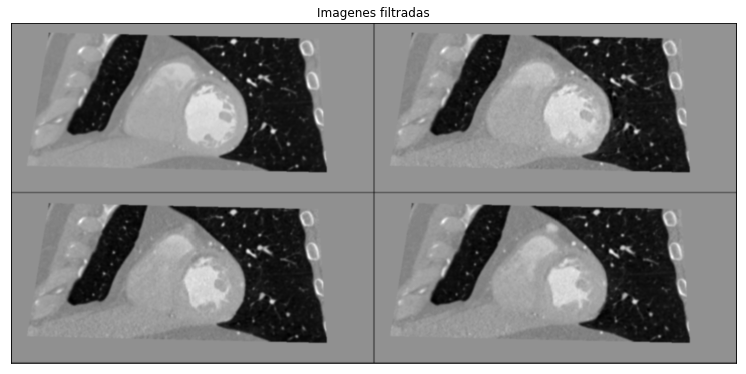

In [979]:
plt.figure(figsize=(13,8))
plt.imshow(a3, cmap='gray')
plt.title('Imagenes filtradas')
plt.xticks([])
plt.yticks([])
plt.show()

In [980]:
# Calculo de los histogramas

imgs_hist = []
imgs_bin_hist = []

for i in range(10):
    imgs_hist.append(exposure.histogram(imgs[i], nbins=256))
    imgs_bin_hist.append(exposure.histogram(imgs_binomial[i], nbins=256))

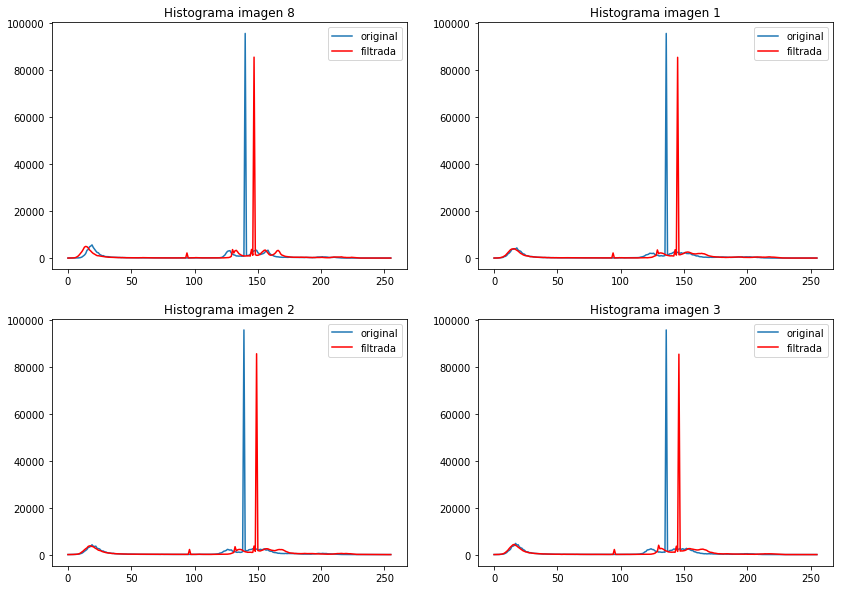

In [981]:
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(imgs_hist[7][0])
plt.plot(imgs_bin_hist[7][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 8')
plt.subplot(222)
plt.plot(imgs_hist[0][0])
plt.plot(imgs_bin_hist[0][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 1')
plt.subplot(223)
plt.plot(imgs_hist[1][0])
plt.plot(imgs_bin_hist[1][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 2')
plt.subplot(224)
plt.plot(imgs_hist[2][0])
plt.plot(imgs_bin_hist[2][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 3')
plt.show()

In [982]:
# Funcion que calcula la distancia chi-square entre dos histogramas
def chi_square(hist1, hist2):
    d = 0
    for n1, n2 in zip(hist1, hist2):
        d += np.square(n1-n2)
    return d

In [983]:
print('Distancia entre histogramas:\n')
print('Imagen 8')
print('original vs filtrada:', chi_square(imgs_hist[7][0], imgs_bin_hist[7][0]))
print('original vs original: ', chi_square(imgs_hist[7][0], imgs_hist[7][0]))
print('\nImagen 1')
print('original vs filtrada:', chi_square(imgs_hist[0][0], imgs_bin_hist[0][0]))
print('original vs original: ', chi_square(imgs_hist[0][0], imgs_hist[0][0]))
print('\nImagen 2')
print('original vs filtrada:', chi_square(imgs_hist[1][0], imgs_bin_hist[1][0]))
print('original vs original: ', chi_square(imgs_hist[1][0], imgs_hist[1][0]))
print('\nImagen 3')
print('original vs filtrada:', chi_square(imgs_hist[2][0], imgs_bin_hist[2][0]))
print('original vs original: ', chi_square(imgs_hist[2][0], imgs_hist[2][0]))

Distancia entre histogramas:

Imagen 8
original vs filtrada: 15915168348
original vs original:  0

Imagen 1
original vs filtrada: 15826446324
original vs original:  0

Imagen 2
original vs filtrada: 15883192296
original vs original:  0

Imagen 3
original vs filtrada: 15901074538
original vs original:  0


In [984]:
'''
https://scicomp.stackexchange.com/questions/5110/python-oss-alternatives-for-matlab-neural-network-toolbox-any-intercomparisons
https://scicomp.stackexchange.com/questions/22108/open-source-tool-comparable-to-matlab-neural-network-tool-box
http://deeplearning.net/software/pylearn2/
http://deeplearning.net/software/theano/
'''

'\nhttps://scicomp.stackexchange.com/questions/5110/python-oss-alternatives-for-matlab-neural-network-toolbox-any-intercomparisons\nhttps://scicomp.stackexchange.com/questions/22108/open-source-tool-comparable-to-matlab-neural-network-tool-box\nhttp://deeplearning.net/software/pylearn2/\nhttp://deeplearning.net/software/theano/\n'

### B.1 Reconocimiento mediante analisis del histograma

Se define una serie de parches que se ubican en la region del ventriculo para calcular su histograma y formar uno nuevo con el promedio de los histogramas.

Posteriormente, se realiza un 'barrido' en la imagen, calculando el histograma de forma local para cada region definida por el parche y obtener la distancia chi-square con respecto al histograma promedio.

In [985]:
# Creacion del parche y la mascara para calcular el histograma en la imagen
psize = 30                                                    
patch = np.ones((psize, psize), dtype='uint8')

# Coordenadas parche 1
xy1m1 = (370, 150)
xy2m1 = (370+psize, 150+psize)
# Coordenadas parche 2
xy1m2 = (350, 190)
xy2m2 = (350+psize, 190+psize)
# Coordenadas parche 3
xy1m3 = (400, 200)
xy2m3 = (400+psize, 200+psize)
# Coordenadas parche 4
xy1m4 = (410, 140)
xy2m4 = (410+psize, 140+psize)
# Coordenadas parche 5
xy1m5 = (390, 170)
xy2m5 = (390+psize, 170+psize)
# Coordenadas parche 6
xy1m6 = (350, 160)
xy2m6 = (350+psize, 160+psize)
# Coordenadas parche 7
xy1m7 = (410, 180)
xy2m7 = (410+psize, 180+psize)
# Coordenadas parche 8
xy1m8 = (360, 140)
xy2m8 = (360+psize, 140+psize)


mask1 = np.pad(patch, ((xy1m1[1], 340-xy2m1[1]), (xy1m1[0], 724-xy2m1[0])), 'constant')
mask2 = np.pad(patch, ((xy1m2[1], 340-xy2m2[1]), (xy1m2[0], 724-xy2m2[0])), 'constant')
mask3 = np.pad(patch, ((xy1m3[1], 340-xy2m3[1]), (xy1m3[0], 724-xy2m3[0])), 'constant')
mask4 = np.pad(patch, ((xy1m4[1], 340-xy2m4[1]), (xy1m4[0], 724-xy2m4[0])), 'constant')
mask5 = np.pad(patch, ((xy1m5[1], 340-xy2m5[1]), (xy1m5[0], 724-xy2m5[0])), 'constant')
mask6 = np.pad(patch, ((xy1m6[1], 340-xy2m6[1]), (xy1m6[0], 724-xy2m6[0])), 'constant')
mask7 = np.pad(patch, ((xy1m7[1], 340-xy2m7[1]), (xy1m7[0], 724-xy2m7[0])), 'constant')
mask8 = np.pad(patch, ((xy1m8[1], 340-xy2m8[1]), (xy1m8[0], 724-xy2m8[0])), 'constant')

In [986]:
mask1.shape

(340, 724)

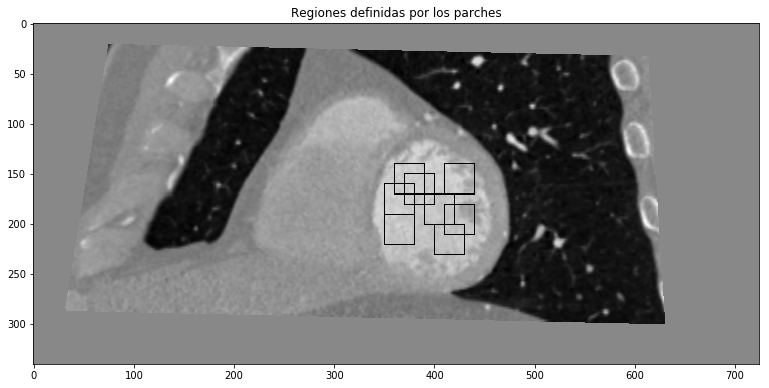

In [987]:
# Ubicacion del parche que se uso para calcular el histograma promedio
plt.figure(figsize=(13,8))
img_label = imgs[0].copy()

plt.imshow(cv2.rectangle(img_label, xy1m1, xy2m1,(0)), cmap='gray')
plt.imshow(cv2.rectangle(img_label, xy1m2, xy2m2,(0)), cmap='gray')
plt.imshow(cv2.rectangle(img_label, xy1m3, xy2m3,(0)), cmap='gray')
plt.imshow(cv2.rectangle(img_label, xy1m4, xy2m4,(0)), cmap='gray')
plt.imshow(cv2.rectangle(img_label, xy1m5, xy2m5,(0)), cmap='gray')
plt.imshow(cv2.rectangle(img_label, xy1m6, xy2m6,(0)), cmap='gray')
plt.imshow(cv2.rectangle(img_label, xy1m7, xy2m7,(0)), cmap='gray')
plt.imshow(cv2.rectangle(img_label, xy1m8, xy2m8,(0)), cmap='gray')
plt.title('Regiones definidas por los parches')
plt.show()

In [988]:
# Calcular el histograma en el parche definido
hist_mask1 = cv2.calcHist([imgs[0]], None, mask1, [256], [0,255])
hist_mask2 = cv2.calcHist([imgs[0]], None, mask2, [256], [0,255])
hist_mask3 = cv2.calcHist([imgs[0]], None, mask3, [256], [0,255])
hist_mask4 = cv2.calcHist([imgs[0]], None, mask4, [256], [0,255])
hist_mask5 = cv2.calcHist([imgs[0]], None, mask5, [256], [0,255])
hist_mask6 = cv2.calcHist([imgs[0]], None, mask6, [256], [0,255])
hist_mask7 = cv2.calcHist([imgs[0]], None, mask7, [256], [0,255])
hist_mask8 = cv2.calcHist([imgs[0]], None, mask8, [256], [0,255])

In [989]:
# Calcular el histograma promedio
hist_avg = np.zeros((256,1))

hist_avg = (hist_mask1+hist_mask2+hist_mask3+hist_mask4+hist_mask5+hist_mask6+hist_mask7+hist_mask8)/8

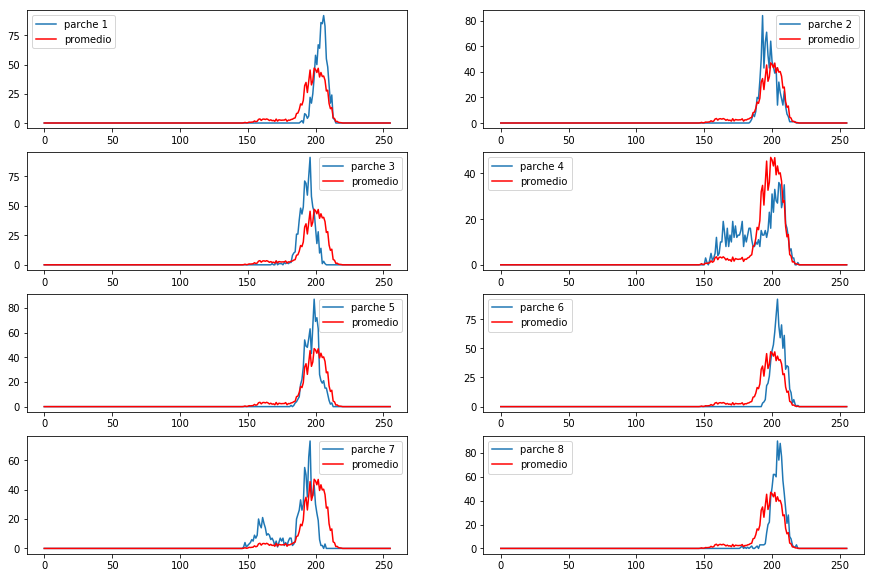

In [990]:
plt.figure(figsize=(15,10))
plt.subplot(421)
plt.plot(hist_mask1)
plt.plot(hist_avg, 'r')
plt.legend(['parche 1', 'promedio'])
 #plt.title('Histograma parche 1')
plt.subplot(422)
plt.plot(hist_mask2)
plt.plot(hist_avg, 'r')
plt.legend(['parche 2', 'promedio'])
#plt.title('Histograma parche 2')
plt.subplot(423)
plt.plot(hist_mask3)
plt.plot(hist_avg, 'r')
plt.legend(['parche 3', 'promedio'])
#plt.title('Histograma parche 3')
plt.subplot(424)
plt.plot(hist_mask4)
plt.plot(hist_avg, 'r')
plt.legend(['parche 4', 'promedio'])
#plt.title('Histograma parche 4')
plt.subplot(425)
plt.plot(hist_mask5)
plt.plot(hist_avg, 'r')
plt.legend(['parche 5', 'promedio'])
#plt.title('Histograma parche 5')
plt.subplot(426)
plt.plot(hist_mask6)
plt.plot(hist_avg, 'r')
plt.legend(['parche 6', 'promedio'])
#plt.title('Histograma parche 6')
plt.subplot(427)
plt.plot(hist_mask7)
plt.plot(hist_avg, 'r')
plt.legend(['parche 7', 'promedio'])
#plt.title('Histograma parche 7')
plt.subplot(428)
plt.plot(hist_mask8)
plt.plot(hist_avg, 'r')
plt.legend(['parche 8', 'promedio'])
#plt.title('Histograma parche 8')
plt.show()

In [1111]:
# Barrido del parche sobre la imagen

def err_distance(img, hist_avg, patch, psize):
    '''
        Calcula el mapa de distancias usando el histograma promedio como referencia.
        Para ello realiza un barrido sobre la imagen, calculando de forma local los
        histogramas en cada region definida por el parche
    '''
    x1, y1 = 0, 0
    x2, y2 = 0, 0
    local_hists = []                                        # Histogramas locales
    hist_distances = []
    err_dist = np.full(img.shape, 850000)               # Distancias entre histogramas
    err_mask = np.zeros(img.shape, dtype='uint8')       # Imagen binaria (regiones con menor distancias)
  
    for i in range(0, img.shape[0]-psize, psize):
        for j in range(0, img.shape[1]-psize, psize):
            # Determinar las coordenadas de 2 vertices de la region
            # para obtener una mascara, se usara para calcular el 
            # histograma en la region de interes
            x1, y1 = j, i
            x2, y2 = x1+psize, y1+psize
            # Creacion de la mascara con el parche
            mask = np.pad(patch, ((y1, img.shape[0]-y2), (x1, img.shape[1]-x2)), 'constant')
            local_hist = cv2.calcHist([img], None, mask, [256], [0,255])
            local_hists.append(local_hist)
            # Calculo de la distancia entre histogramas (promedio y local)
            hdistance = chi_square(hist_avg, local_hist)
            #hdistance = cv2.compareHist(hist_avg, local_hist, cv2.HISTCMP_CHISQR)
            err_dist[y1:y2, x1:x2] = hdistance
            hist_distances.append(hdistance)
            
    return [err_dist, local_hists, hist_distances]

In [1112]:
err_dist, hist1, hdist1 = err_distance(imgs[0], hist_avg, patch, psize)
err_dist2, hist2, hdist2 = err_distance(imgs[1], hist_avg, patch, psize)
err_dist3, hist3, hdist3 = err_distance(imgs[5], hist_avg, patch, psize)
err_dist4, hist4, hdist4 = err_distance(imgs[6], hist_avg, patch, psize)

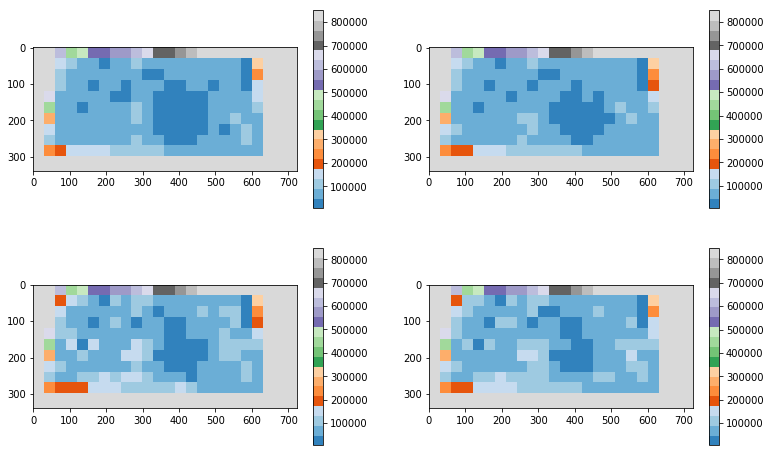

In [993]:
plt.figure(figsize=(13,8))
plt.subplot(221)
plt.imshow(err_dist, cmap='tab20c')
plt.colorbar()
plt.subplot(222)
plt.imshow(err_dist2, cmap='tab20c')
plt.colorbar()
plt.subplot(223)
plt.imshow(err_dist3, cmap='tab20c')
plt.colorbar()
plt.subplot(224)
plt.imshow(err_dist4, cmap='tab20c')
plt.colorbar()
plt.show()

In [994]:
# Binarizacion del mapa de distancias
err_mask = err_dist < 50000    
# Conversion de boolean a entero 
err_mask = err_mask * 1   
# Aplicar transformacion morfologica a la mascara
opening = cv2.morphologyEx(err_mask.astype(np.float32), cv2.MORPH_OPEN, np.ones((40,40)))

In [995]:
# Binarizacion del mapa de distancias
err_mask2 = err_dist2 < 40000    
# Conversion de boolean a entero 
err_mask2 = err_mask2 * 1   
# Aplicar transformacion morfologica a la mascara
opening2 = cv2.morphologyEx(err_mask2.astype(np.float32), cv2.MORPH_OPEN, np.ones((40,40)))

In [996]:
# Binarizacion del mapa de distancias
err_mask3 = err_dist3 < 45000    
# Conversion de boolean a entero 
err_mask3 = err_mask3 * 1   
# Aplicar transformacion morfologica a la mascara
opening3 = cv2.morphologyEx(err_mask3.astype(np.float32), cv2.MORPH_OPEN, np.ones((40,40)))

In [997]:
# Binarizacion del mapa de distancias
err_mask4 = err_dist4 < 47000
# Conversion de boolean a entero 
err_mask4 = err_mask4 * 1   
# Aplicar transformacion morfologica a la mascara
opening4 = cv2.morphologyEx(err_mask4.astype(np.float32), cv2.MORPH_OPEN, np.ones((60,60)))

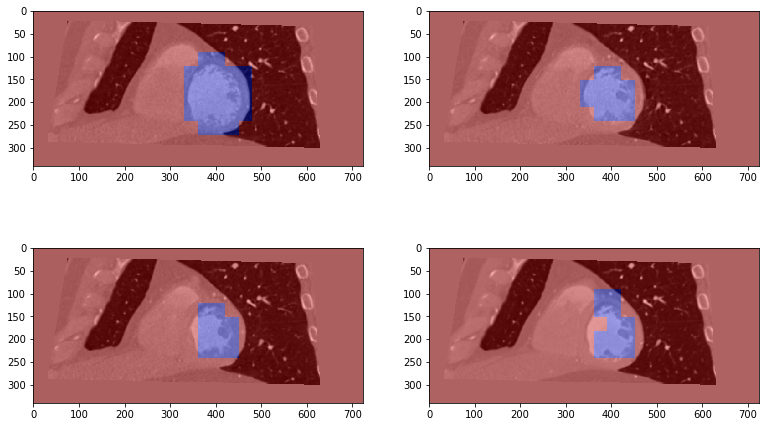

In [998]:
plt.figure(figsize=(13, 8))
plt.subplot(221)
plt.imshow(color.label2rgb(opening, image=imgs[0]))
plt.subplot(222)
plt.imshow(color.label2rgb(opening2, image=imgs[1]))
plt.subplot(223)
plt.imshow(color.label2rgb(opening3, image=imgs[2]))
plt.subplot(224)
plt.imshow(color.label2rgb(opening4, image=imgs[6]))
plt.show()

### B.2 Estadisticas del histograma
Se forma un vector de caracteristicas usando como informacion:

1. Media
2. Varianza
3. Momentos (n=4)
4. Entropia

In [1071]:
h = [hist_mask1, hist_mask2, hist_mask3, hist_mask4, hist_mask5, hist_mask6, hist_mask7, hist_mask8]

h_p = []

for hist in h:
    mean = np.mean(hist)
    var = np.var(hist)
    skew = scipy.stats.skew(hist)
    entropy = scipy.stats.entropy(hist)[0]
    h_p.append([mean, var, skew, entropy])
    
h_p = np.array(h_p)

In [1072]:
print('Vector de caracteristicas de los histogramas (parches)\n')
print('media          varianza      skewness      entropia')
for n in h_p:
    print(n)

Vector de caracteristicas de los histogramas (parches)

media          varianza      skewness      entropia
[  3.515625  201.78096     4.566992    2.8415065]
[  3.515625  151.78098     4.04974     3.1169171]
[  3.515625  171.56221     4.2793655   3.0163276]
[ 3.515625  54.749756   2.3853843  3.992098 ]
[  3.515625  169.82004     4.232542    3.0149326]
[  3.515625  182.66379     4.289134    2.9191077]
[  3.515625  101.99975     3.979925    3.6087728]
[  3.515625  190.65596     4.486276    2.9343529]


In [1073]:
# Obtener el vector de caracteristicas promedio
vhist_mean = []
for n1, n2, n3, n4, n5, n6, n7, n8 in zip(h_p[0], h_p[1], h_p[2], h_p[3], h_p[4], h_p[5], h_p[6], h_p[7]):
    vhist_mean.append((n1+n2+n3+n4+n5+n6+n7+n8)/8)

vhist_mean = np.array(vhist_mean)
    
print('Vector de caracteristicas promedio\n')
print('media           varianza       skewness       entropia')
print(vhist_mean)

Vector de caracteristicas promedio

media           varianza       skewness       entropia
[  3.515625   153.12669373   4.03366995   3.18050194]


In [1124]:
# Vectores de caracteristicas de la primer imagen
vhist1 = []
for hist in hist1:
    mean = np.mean(hist)
    var = np.var(hist)
    skew  = scipy.stats.skew(hist)
    skew = scipy.stats.skew(hist)
    entropy = scipy.stats.entropy(hist)[0]
    vhist1.append([mean, var, skew, entropy])

vhist1 = np.array(vhist1)

In [1075]:
# Calcular la distancia enuclidiana entre 
# el vector de la imagen 1 y el vector promedio
v_distances1 = []
for v in vhist1:
    dis = scipy.spatial.distance.euclidean(v, vhist_mean)
    v_distances1.append(dis)
    
v_distances1 = np.array(v_distances1)

v_distances1[0:7]

array([2998.6021097 , 2998.6021097 , 2122.72834288, 1504.65325783,
       1584.74595604, 1786.18732546, 1801.25751159])

In [1076]:
# Mapa de distancias entre los vectores de caracteristicas

def vect_distance(img, distances, patch, psize):
    '''
        Calcula el mapa de distancias usando el histograma promedio como referencia.
        Para ello realiza un barrido sobre la imagen, calculando de forma local los
        histogramas en cada region definida por el parche
    '''
    x1, y1 = 0, 0
    x2, y2 = 0, 0
    err_dist = np.full(img.shape, np.max(distances))               # Distancias entre histogramas
    k = 0
    
    for i in range(0, img.shape[0]-psize, psize):
        for j in range(0, img.shape[1]-psize, psize):
            # Determinar las coordenadas de 2 vertices de la region
            # para obtener una mascara, se usara para calcular el 
            # histograma en la region de interes
            x1, y1 = j, i
            x2, y2 = x1+psize, y1+psize
            err_dist[y1:y2, x1:x2] = distances[k]
            k += 1
            
    return err_dist

In [1077]:
# Mapa de distancias de la imagen 1
vect_distance_map = vect_distance(imgs[0], v_distances1, patch, psize)

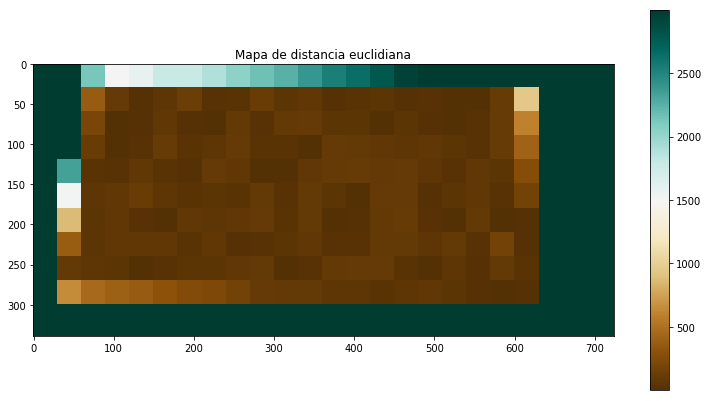

In [1105]:
plt.figure(figsize=(13, 7))
plt.imshow(vect_distance_map, cmap='BrBG')
plt.title('Mapa de distancia euclidiana')
plt.colorbar()
plt.show()

### B.4 Clasificador de Naive Bayes

In [1121]:
vhist1
hdist1
target_v1 = []

for vector, distance in zip(vhist1, hdist1):
    if distance < 50000:
        target_v1.append(1)
    else:
        target_v1.append(0)

In [1126]:
from sklearn.naive_bayes import GaussianNB

x_train = vhist1
y_target = target_v1

clf = GaussianNB()
clf.fit(x_train, y_target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [1146]:
predim1 = clf.predict(x_train)
predim1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1131]:
def reconstruct_mask(prediction, imx, imy):
    
    x1, y1 = 0, 0
    x2, y2 = 0, 0
    mask = np.zeros((imy, imx))
    k = 0
    
    for i in range(0, imx-psize, psize):
        for j in range(0, imy-psize, psize):
            # Determinar las coordenadas de 2 vertices de la region
            # para obtener una mascara, se usara para calcular el 
            # histograma en la region de interes
            x1, y1 = j, i
            x2, y2 = x1+psize, y1+psize
            mask[y1:y2, x1:x2] = prediction[k]
            k += 1
    return mask

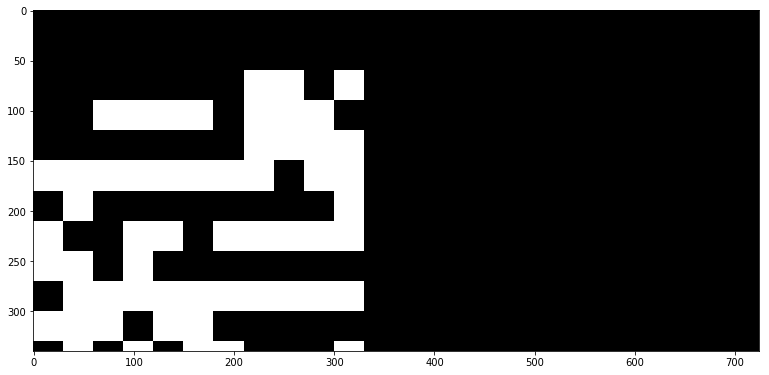

In [1148]:
mask_p1 = reconstruct_mask(predim1, imgs[0].shape[1], imgs[0].shape[0])

plt.figure(figsize=(13, 7))
plt.imshow(mask_p1, cmap='gray')
plt.show()

### 4. Conclusiones

La ecualizacion local del histograma de la imagen del corazon se realizo con distintos tamanos de ventana y se obtuvieron resultados que fueron comparados con la version a la cual se le agrego ruido gausiano. Se pudieron notar las diferencias, siendo que cuando hay ruido presente, la ecualizacion no es la mejor.

La region del ventriculo del corazon pudo ser reconocido usando la distancia chi-square entre los histogramas locales (definidos por el tamano del parche) con respecto al histograma promedio de los 3 parches seleccionados.

En el mapa de distancias se puede visualizar en que zonas de la imagen se encuentran los histogramas locales con menor cantidad de error. A partir de esas regiones se obtiene la mascara binaria que indica la posicion.

El vector de caracteristicas de los histogramas de los parches fue creado a partir de medidas estadisticas que se calcularon usando las bibliotecas de numpy y scipy.

### 5. Referencias

distancia euclidiana n-dimensiones: https://hlab.stanford.edu/brian/euclidean_distance_in.html